In [64]:
# importing required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [65]:
# read the dataset

data=pd.read_csv('1.2ML_ModelTraining_Dataset.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [66]:
# Getting the shape of the dataset

data.shape

(9240, 37)

In [67]:
# Getting the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see there is 4 float datatype features, 3 integer datatype features and 30 object features in the dataset.

We can see that some features with more NaN values.

In [68]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

We can see the unique values of each feature

There are more categories in some columns

# Exploratory data analysis

In [69]:
# Categorical variables
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']

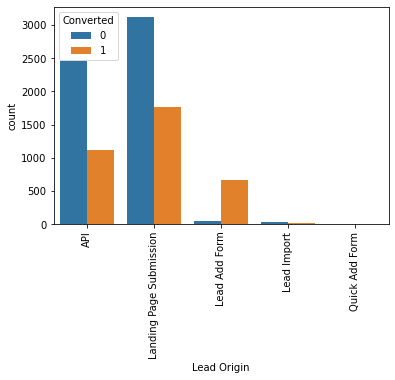

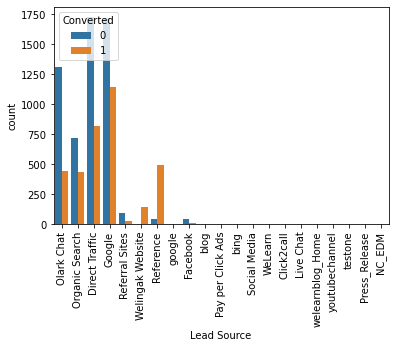

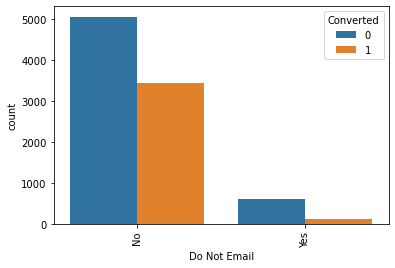

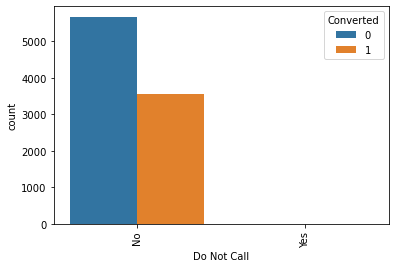

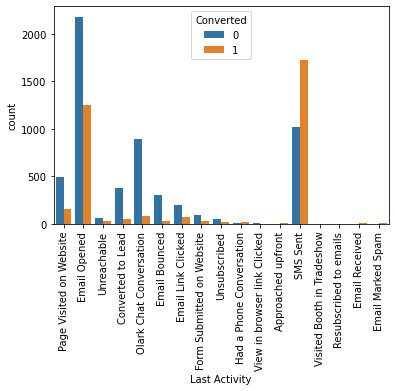

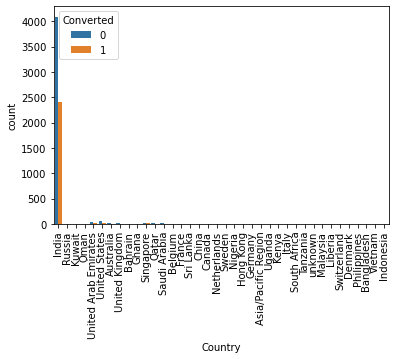

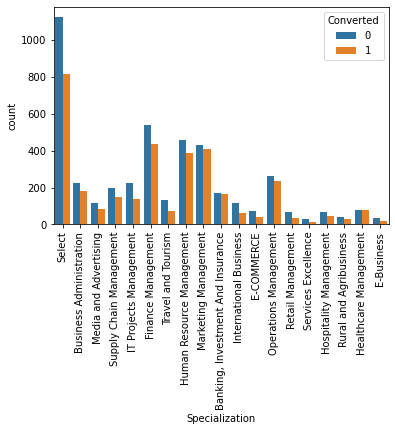

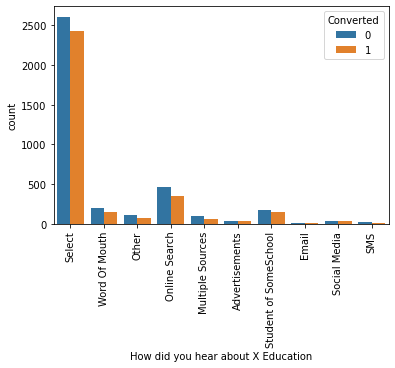

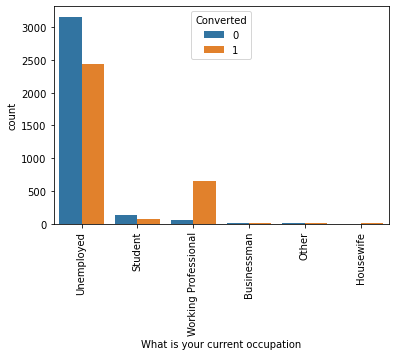

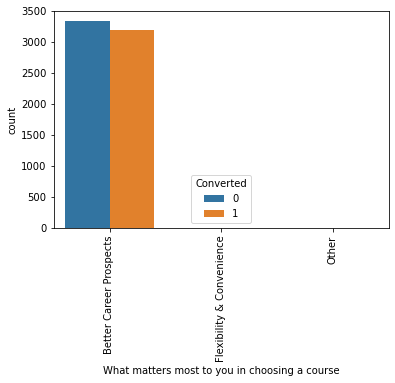

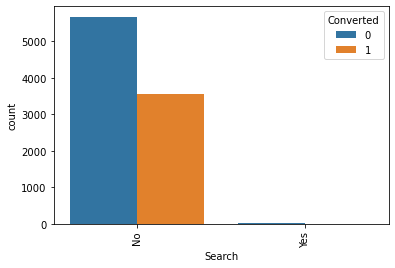

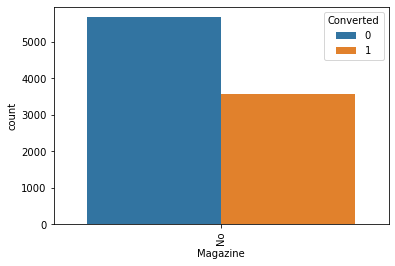

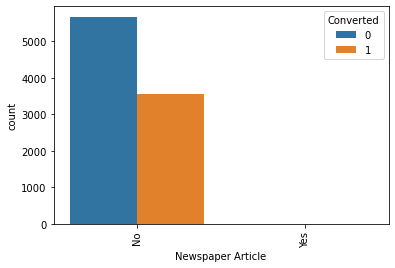

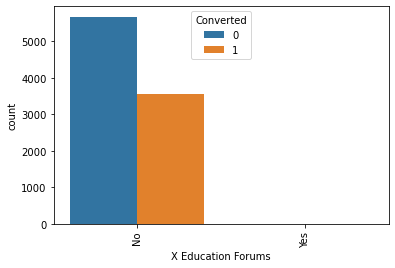

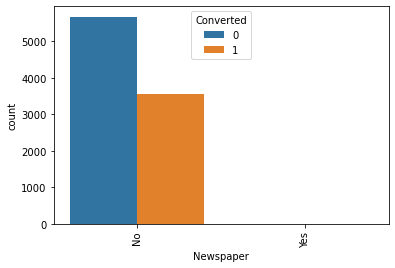

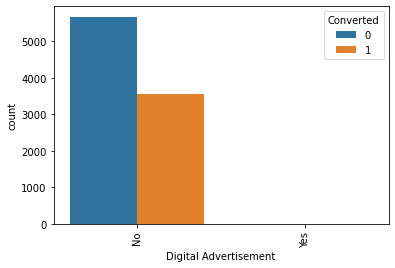

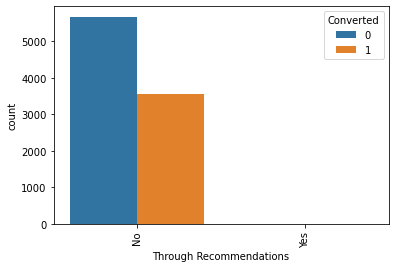

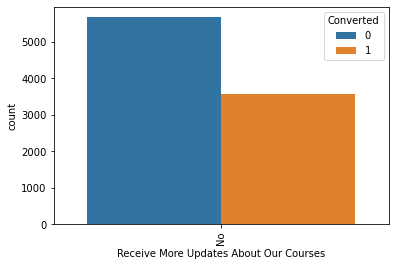

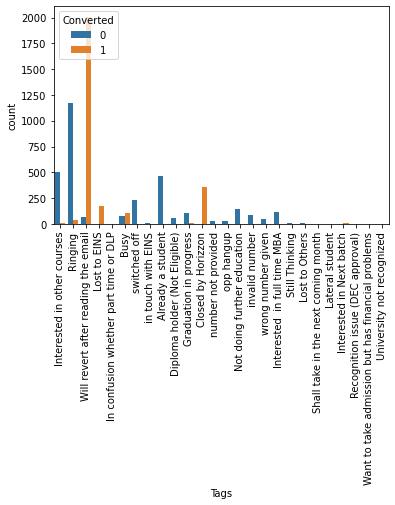

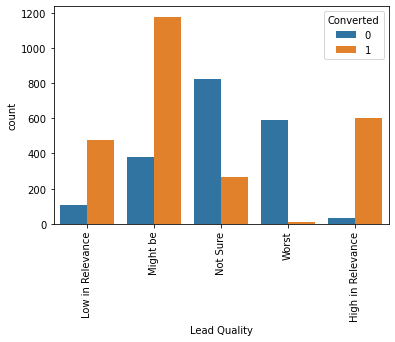

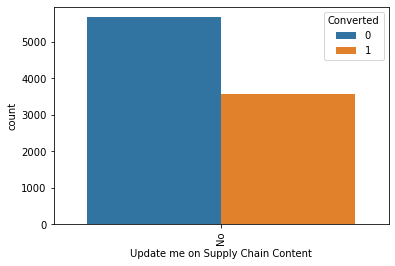

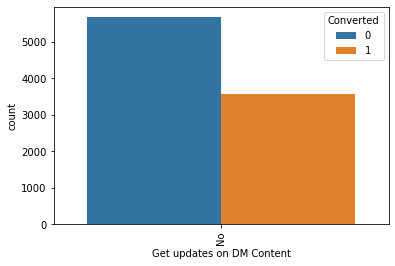

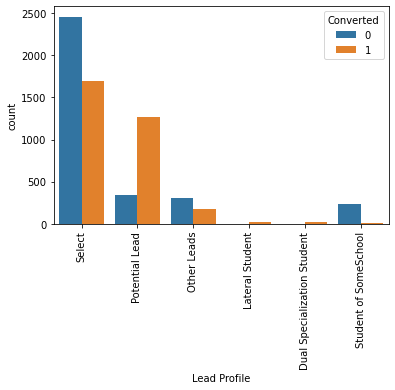

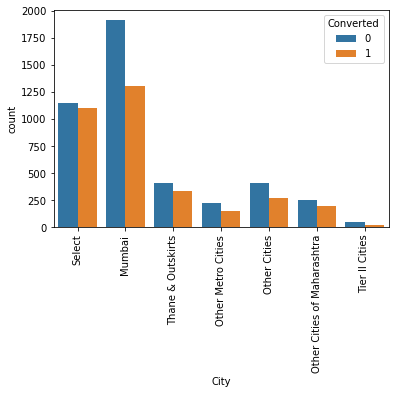

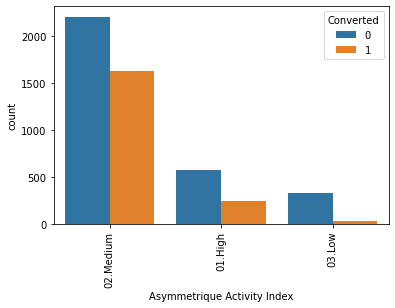

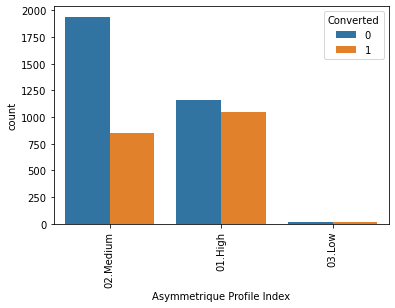

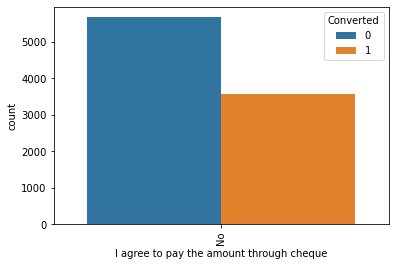

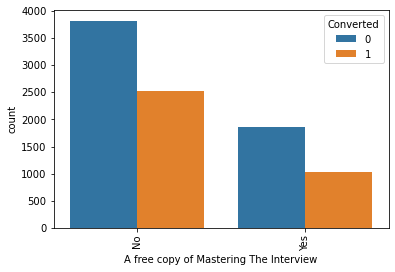

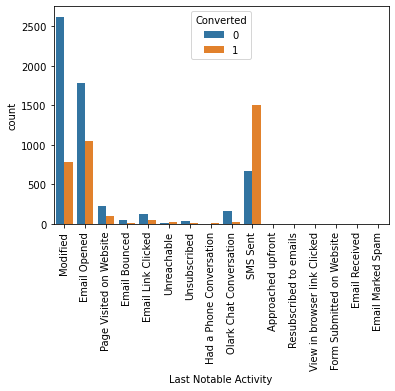

In [70]:
# Lets plot count plots for categorical_features hue= converted
for feature in categorical_features[1:]:
    cat=data.copy()
    plt.xticks(rotation=90)
    sns.countplot(x=feature,hue='Converted',data=cat)
    plt.show()

We can see lead origin Landing page submission are more converted.

WE can see lead source in google are more converted.

We can see last activity with SMS sent are highgly converted.

We can see specialization select are highly converted.

We can see more pepole are unemployed who is converted.

Best carrier prospects are making matters to convert.

More people in stage of We will revert back after reading Email.

Lead quality might be converted high.

We can see more converted from mumbai.

We can see medium asymmetrique activity index people are are highly converted.

We can see medium asymmetrique profile index people are are highly converted.

In [71]:
Numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print('Number of numerical features: ',len(Numerical_features))

Number of numerical features:  7


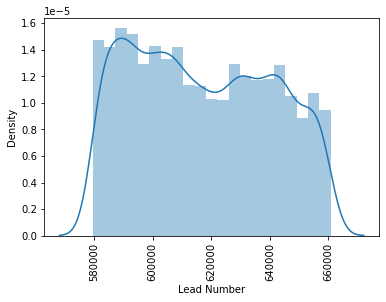

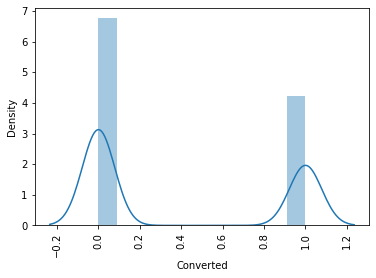

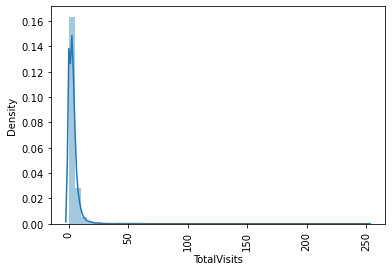

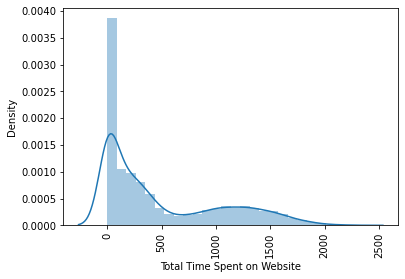

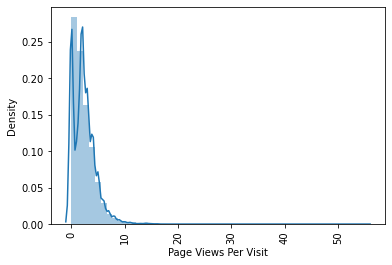

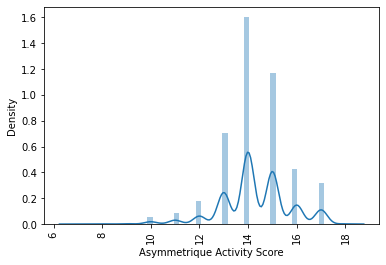

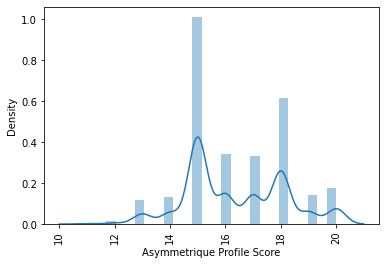

In [72]:
# Lets plot distribtion plots for Numerical features
for feature in Numerical_features:
    num=data.copy()
    plt.xticks(rotation=90)
    sns.distplot(x=num[feature])
    plt.xlabel(feature)
    plt.show()

We can see lead number range between 58000 to 66000

We can see this is a binary classification problem

We can see Total time spend on website is positively skewed

We can see page views per visit is positively skewed

We can see Asymmetrique profile activity score and asymmetrique profile scores has descrete values

# Feature Engineering

In [73]:
# Dropping unwanted columns this are with more NaN values and single predominant variables
drop_list=['Prospect ID','Lead Number','Last Activity','Country','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','I agree to pay the amount through cheque']

In [74]:
# Dropping the unwanted columns
data=data.drop(drop_list,axis=1)

In [75]:
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Media and Advertising,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Select,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,IT Projects Management,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,Media and Advertising,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,Business Administration,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,Human Resource Management,No,SMS Sent


In [76]:
data.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Specialization                            1438
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [77]:
# Filling NaN values with appropriate values

data['Specialization']=data['Specialization'].fillna(data['Specialization'].mode()[0])
data['Lead Source']=data['Lead Source'].fillna(data['Lead Source'].mode()[0])
data['TotalVisits']=data['TotalVisits'].fillna(data['TotalVisits'].mean())
data['Page Views Per Visit']=data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mean())

In [78]:
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [79]:
data.nunique()

Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 42
Total Time Spent on Website               1731
Page Views Per Visit                       115
Specialization                              19
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [82]:
# Lets obtain count of each categorical label and make the dictionaryto map
lead=data['Lead Origin'].value_counts().to_dict()
source=data['Lead Source'].value_counts().to_dict()
email=data['Do Not Email'].value_counts().to_dict()
call=data['Do Not Call'].value_counts().to_dict()
spec=data['Specialization'].value_counts().to_dict()
inter=data['A free copy of Mastering The Interview'].value_counts().to_dict()
last=data['Last Notable Activity'].value_counts().to_dict()

In [83]:
# Replace all lables with count
data['Lead Origin']=data['Lead Origin'].map(lead)
data['Lead Source']=data['Lead Source'].map(source)
data['Do Not Email']=data['Do Not Email'].map(email)
data['Do Not Call']=data['Do Not Call'].map(call)
data['Specialization']=data['Specialization'].map(spec)
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].map(inter)
data['Last Notable Activity']=data['Last Notable Activity'].map(last)

In [84]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,3580,1755,8506,9238,0,0.0,0,0.0,3380,6352,3407
1,3580,1154,8506,9238,0,5.0,674,2.5,3380,6352,2827
2,4886,2543,8506,9238,1,2.0,1532,2.0,403,2888,2827
3,4886,2543,8506,9238,0,1.0,305,1.0,203,6352,3407
4,4886,2904,8506,9238,1,2.0,1428,1.0,3380,6352,3407


# Feature Scaling

In [85]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [87]:
X=data.drop('Converted',axis=1)
X

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,3580,1755,8506,9238,0.0,0,0.00,3380,6352,3407
1,3580,1154,8506,9238,5.0,674,2.50,3380,6352,2827
2,4886,2543,8506,9238,2.0,1532,2.00,403,2888,2827
3,4886,2543,8506,9238,1.0,305,1.00,203,6352,3407
4,4886,2904,8506,9238,2.0,1428,1.00,3380,6352,3407
...,...,...,...,...,...,...,...,...,...,...
9235,4886,2543,734,9238,8.0,1845,2.67,366,6352,2
9236,4886,2543,8506,9238,2.0,238,2.00,203,2888,2172
9237,4886,2543,734,9238,2.0,199,2.00,403,2888,2172
9238,4886,2904,8506,9238,3.0,499,3.00,848,6352,2172


In [88]:
y=data['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

In [89]:
# Scaling the independent features
X=sc.fit_transform(X)
X

array([[-0.3757565 , -0.44796926,  0.29375505, ...,  1.29496225,
         0.67428477,  0.8383196 ],
       [-0.3757565 , -1.17543107,  0.29375505, ...,  1.29496225,
         0.67428477,  0.19576207],
       [ 0.72249925,  0.50584091,  0.29375505, ..., -0.86883181,
        -1.48305293,  0.19576207],
       ...,
       [ 0.72249925,  0.50584091, -3.4041968 , ..., -0.86883181,
        -1.48305293, -0.52988479],
       [ 0.72249925,  0.94280217,  0.29375505, ..., -0.5453893 ,
         0.67428477, -0.52988479],
       [ 0.72249925,  0.50584091,  0.29375505, ..., -0.90808102,
        -1.48305293,  0.8383196 ]])

# Model Training

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
# Splitting the dataset
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.25,random_state=45) 

In [93]:
# lets see the sahpe of the split
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(6930, 10) (2310, 10) (6930,) (2310,)


In [94]:
# fitting and traing the model
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg.score(train_x,train_y)
predm=lg.predict(test_x)
print('Accuracy score of',lg,'is:')
print(accuracy_score(test_y,predm))
print(confusion_matrix(test_y,predm))
print(classification_report(test_y,predm))

Accuracy score of LogisticRegression() is:
0.7822510822510822
[[1233  186]
 [ 317  574]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1419
           1       0.76      0.64      0.70       891

    accuracy                           0.78      2310
   macro avg       0.78      0.76      0.76      2310
weighted avg       0.78      0.78      0.78      2310



From above evaluation metrics the data is not underfit or overfit

With Logistic regression we are getting accuracy of 78%

In [95]:
#Saving the model 

import joblib
joblib.dump(lg,'model_logostic.ob')

['model_logostic.ob']